<a href="https://colab.research.google.com/github/flat35hd99/report_magnetical_material/blob/master/20200430magnetical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#問題（1）
室温におけるNiの磁化の磁場依存性の測定データを使用して誘導起電力の振幅V0
(V)を磁場H(Oe)に対してプロットしたグラフを作成せよ。

## 回答

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

data_H, data_T, data_V = np.loadtxt("/content/drive/My Drive/Colab Notebooks/Data_Magnetism/Ni/M-H_Ni_300K.txt", skiprows=1, unpack=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


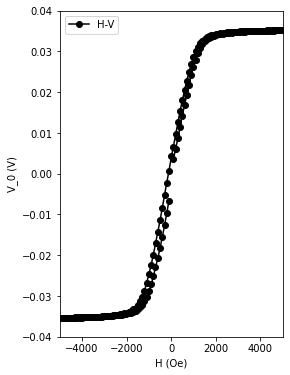

In [0]:
fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
ax.plot(data_H,data_V, "o-", color="k", label="H-V")
ax.set_xlim(-5000,5000)
ax.set_ylim(-0.04,0.04)
ax.set_xlabel("H (Oe)")
ax.set_ylabel("V_0 (V)")
ax.legend(loc="upper left")

#問題（２）
磁場の印可により飽和する誘導起電力の振幅V_0(V)を見積もり、既知の Niの飽和磁化M_0の値を用いて磁気双極子モーメントmと振幅V0の比例係数αを求めよ。 Niの飽和磁化M_0の値は室温(298 K)で55.07 emu/g（質量磁化）であり、使用した試料の質量は0.2704 gとする。

## 回答
問題（1）の結果から、V = 0.0351, -0.03533まで振れており、H = 約2000, -2000(Oe)付近から漸近しているため、この二つの値の絶対値の平均を取った V = 0.03522をV<sub>0</sub>として計算する。  
m<sub>CGS</sub> = m<sub>si</sub> / (4π e-10) = μ<sub>0</sub>MV / (4π e-10)  
また
α = m<sub>CGS</sub>/V<sub>0</sub>  


In [0]:
mu_0 = 1.256637 * 10**-6 # 磁気定数
M = 55.07 # 質量磁化 55.07 emu/g
mass_nickel = 0.2704 # 試料の質量0.2704 g

m_si = mu_0 * M * mass_nickel # si単位系での磁化
m_cgs = m_si/(4*np.pi*10**-10) #cgs単位系での磁化
alpha_experiment = m_cgs / 0.03522 # V_0の実験結果から取った値

print("m_cgs =",m_cgs)
print("α =", alpha_experiment)

m_cgs = 14890.92727199519
α = 422797.4807494375




理論値からの算出では  
V<sub>0</sub> = 3m<sub>si</sub>aωNS / 4piR<sup>2</sup>  
S = 95 mm<sup>2</sup>, N = 14500 turn * 4個, R = 19.5 mm, a = 2.5 mm, ω = 2πf, f = 10Hz, θ = 42°, f(θ) = 1.18, m<sub>si</sub> = 4π * 10<sup>-10</sup>m<sub>CGS</sub>を代入して、 

In [0]:
a = 2.5 # 2.5mm
f = 10 # 10Hz
omega = 2 * np.pi * f
N = 14500 * 4 # 14500turn * 4個
S = 95 # 95mm**2
f_theta = 1.18
R = 19.5 # 19.5mm

V_0 = ((3 * m_si * a * omega * N * S)/(4 * np.pi * R ** 4)) * f_theta
theoretical_alpha = m_cgs/V_0

print("V_0 =", V_0)
print("α =", theoretical_alpha)

V_0 = 0.03155426256299886
α = 471914.91933189967


# 問題（3）
~~今回の計算では合わなかった。~~  
実験からはα = 4.227 e+5, 理論値ではα = 4.719 e+5である。無視できない誤差がある。
# 問題（4）
モル磁化 M( emu/mol )は測定から得られた各 Vから求める。  
さきほど得たαの値に計測値Vを掛けて、試料のモル数で割る。

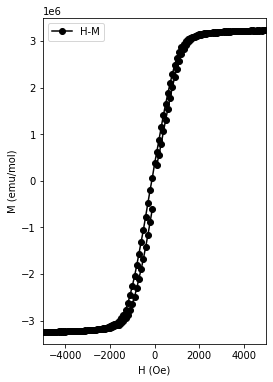

In [0]:
nickel_mass_number = 58.6934 # ニッケルの質量数
sample_mole = mass_nickel / nickel_mass_number # 試料のモル数

molar_magnetization = (alpha_experiment / sample_mole) * data_V # 計測データVの全要素にαをかけてモルで割ることで求めている。

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
ax.plot(data_H,molar_magnetization, "o-", color="k", label="H-M")
ax.set_xlim(-5000,5000)
ax.set_ylim(-3500000, +3500000)
ax.set_xlabel("H (Oe)")
ax.set_ylabel("M (emu/mol)")
ax.legend(loc="upper left")

#問題（5）
Niの１原子当たりの飽和磁化M<sub>0</sub>はボーア磁子μ<sub>B</sub>を単位にした場合、どのような値になるか求めよ。
(μ<sub>B</sub>= 9.27×10−21 (emu)であり磁化と同じ単位である。)